In [172]:
## Import friends
import cv2
import numpy as np
import os

In [173]:
# Open the video with opencv
vidcap = cv2.VideoCapture('Triangle2.mp4')

In [174]:
# Read returns a boolean and the image
success, image = vidcap.read()
# Frame counter
count = 0
# Let's assume the first frame has been read successfully
success = True
# As long as there are frames to read
while success:
    success, image = vidcap.read()
    # Save the image under CutVid/frame[FrameNumber].jpg
    cv2.imwrite('CutVid/frame{}.jpg'.format(count), image)
    count += 1

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [175]:
# Load the hidden image as an array
hidden = np.asarray(cv2.imread('Hidden.png'))

In [176]:
# We list the directory containing the frames.
# We need the os_sorted method from the natsort package (on Pypi)
# Because python sorts it's way, but OSes have other plans
vid_list = os_sorted(os.listdir('CutVid'))

In [177]:
# Array containing all the vids images
image_array = []
# Frame counter
cnt = 0
for file in vid_list:
    # If the counter is 720, break.
    # Simple reason : our hidden image is 1280x720
    if cnt == 720:
        break
    # Read the image
    img = cv2.imread('CutVid/' + file)
    # Put it in an array
    mod = np.asarray(img)
    # Inject the hidden image's pixel line to the video frame
    mod[cnt:cnt+1,:] = hidden[cnt:cnt+1,:]
    # Routine
    h, w, d = img.shape
    size = (w,h)
    # Append the modified image to the video array
    image_array.append(mod)
    cnt += 1

In [178]:
# So we can see our results
import matplotlib.pyplot as plt

In [179]:
# Write out the video to the "subliminal.avi" file. Format is DIVX, 60fps, and size is the tuple (720, 1280)
out_vid = cv2.VideoWriter('subliminal.avi', cv2.VideoWriter_fourcc(*'DIVX'), 60, size)

In [180]:
# Effectively write images to the video
for i in range(len(image_array)):
    out_vid.write(image_array[i])
out_vid.release()

### WRITE-UP

In [181]:
# Load the video into a VideoCapture variable
vidcap = cv2.VideoCapture('subliminal.avi')

In [182]:
# Empty canvas
img = np.zeros((720,1280,3))

In [183]:
# Read the video frame by frame
success, image = vidcap.read()
count = 0
success = True
while success:
    success, image = vidcap.read()
    cv2.imwrite('WU/frame{}.jpg'.format(count), image)
    count += 1

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [184]:
# Counter begins at 1.
counter = 1
# For each images in the OS_SORTED list, cut the line, paste it in the empty canvas
for images in os_sorted(os.listdir('WU')):
    loaded = np.asarray(cv2.imread('WU/' + images))
    img[counter:counter+1,:] = loaded[counter:counter+1,:]
    counter += 1

In [185]:
loaded.shape

(720, 1280, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


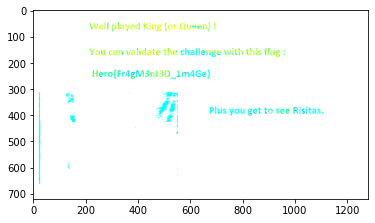

In [186]:
plt.imshow(img)

In [187]:
cv2.imwrite('res.jpg', img)

True